In [111]:
# Import libraries
import matplotlib.image as image
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from skimage import color
import numpy as np

plt.rcParams["figure.figsize"] = [10.50, 7.50]
plt.rcParams["figure.autolayout"] = True

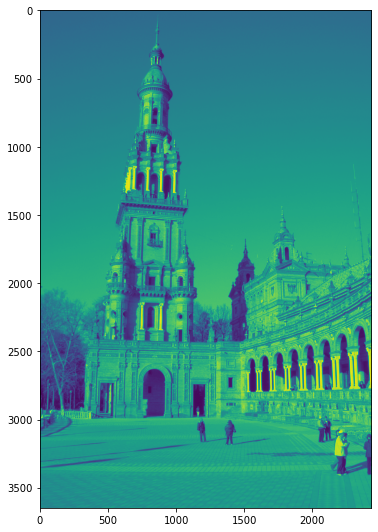

In [112]:
# Importing image
origImage = image.imread('/Users/fernandomontes/Pictures/Sevilla11/DSC01160.jpg', 'jpg')
angle = -90 # in degrees
origImage = ndimage.rotate(origImage, angle, reshape=True)
gwImage = color.rgb2gray(origImage) # image in black and white
#plt.imshow(origImage)   
plt.imshow(gwImage)
plt.show()

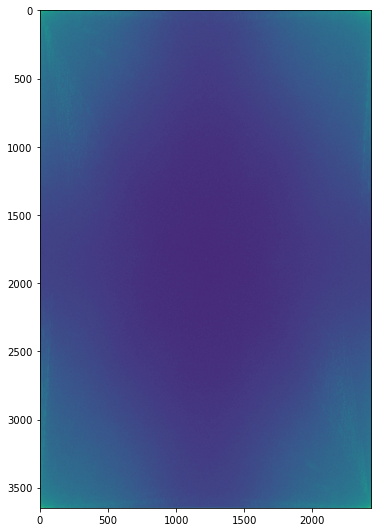

In [114]:
# Fourier transform

def mat2gray(mat):
    import cv2
    
    A = np.double(mat)
    out = np.zeros(A.shape, np.double)
    return cv2.normalize(A, out, 1.0, 0.0, cv2.NORM_MINMAX)

ftCoeff = np.fft.fft2(gwImage)  # Fourier transform coefficients

ftMag = np.log(abs(ftCoeff) + 1)    # Magnitude FT coefficients in log scale
plt.imshow(mat2gray(ftMag))     
plt.show()

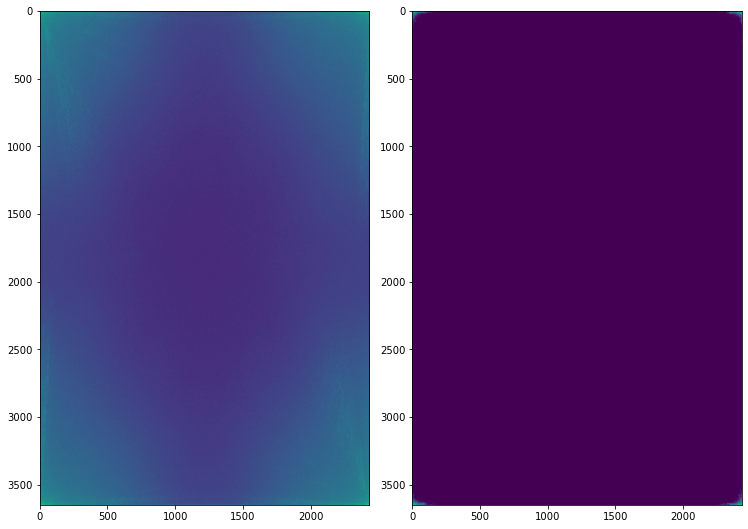

In [136]:
# Keep only 0.1% of the data: Magnitude of the FT coefficient has to be larger than 99.9% of all coeff.

Bt = np.sort(abs(ftCoeff.flatten()))
keep = 0.001
threshold = Bt[np.int((1-keep)*(len(Bt)-1))]  # FT coef. at 95%
valid = abs(ftCoeff) > threshold 
ftCoeffRed = ftCoeff * valid

ftMagRed = np.log(abs(ftCoeffRed)+1)    # Magnitude FT coefficients in log scale

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(mat2gray(ftMag))    
axes[1].imshow(mat2gray(ftMagRed))      
plt.show()

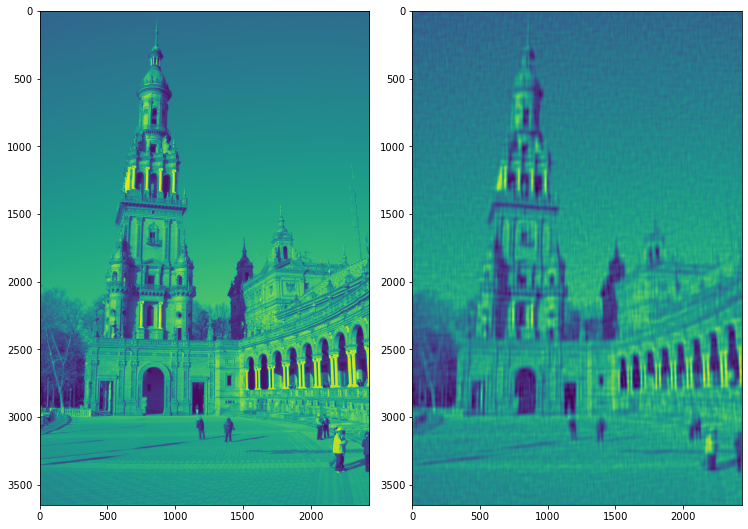

In [137]:
iftCoeff = abs(np.fft.ifft2(ftCoeffRed))  # Inverse fourier transform coefficients

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(mat2gray(gwImage))    
axes[1].imshow(mat2gray(iftCoeff))    
plt.show()